<a href="https://colab.research.google.com/github/Andygrammer/DataVisualization/blob/master/ML_Step0_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main description

The Titanic is the very first challenge of Kaggle competition.

"The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck."

Source: https://www.kaggle.com/c/titanic

# 1. Load libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

# 2. Load dataset

In [36]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Prepare data

In [0]:
vars = ['SEX_BINARY', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

train['Sex'].value_counts()

def convertSex(value):
  if (value == 'female'):
    return 1
  return 0

train['SEX_BINARY'] = train['Sex'].map(convertSex)
test['SEX_BINARY'] = test['Sex'].map(convertSex)

# Examples/Outputs
x = train[vars]
x = x.fillna(-1) # substitute NaN values by -1
y = train['Survived']


# 4. Create model (Random Forest with 100 decision trees)

Acc by validation step:  [0.7937219730941704, 0.8314606741573034, 0.8116591928251121, 0.8157303370786517, 0.8094170403587444, 0.8, 0.8094170403587444, 0.7910112359550562, 0.7892376681614349, 0.8089887640449438, 0.7892376681614349, 0.8337078651685393, 0.7937219730941704, 0.7932584269662921, 0.7869955156950673, 0.8179775280898877, 0.8004484304932735, 0.7752808988764045, 0.8116591928251121, 0.8179775280898877]
Acc mean:  0.8040454476747116
Standard deviation:  0.014899029648072173
Populating the interactive namespace from numpy and matplotlib



/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


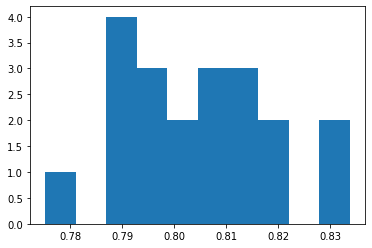

In [32]:
# Validation set 1 (random split)
#np.random.seed(0)
#x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.5)
#print("Acc: ", np.mean(y_valid == p))

# Validation set 2 (cross validation - K-fold)
results = []
k = RepeatedKFold(n_splits=2, n_repeats=10, random_state=0)
for examples, outputs in k.split(x):
  #print("Train: ", examples.shape[0])
  #print("Valid: ", outputs.shape[0])
  #print()
  x_train, x_valid = x.iloc[examples], x.iloc[outputs]
  y_train, y_valid = y.iloc[examples], y.iloc[outputs]

  # 4.1. training
  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(x_train, y_train)
  p = model.predict(x_valid)

  # 4.2. validation
  y_valid = np.mean(y_valid == p)
  results.append(y_valid)

print("Acc by validation step: ", results)
print("Acc mean: ", np.mean(results))
print("Standard deviation: ", np.std(results))

%pylab inline
pylab.hist(results)
print()

# 5. Get results to submission

In [40]:
# 5.1. Testing
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(x, y)
p = model.predict(test[vars].fillna(-1))

# 5.2. Submission

sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape
sub.to_csv("Titanic1.csv", header=True)
!head -n10 Titanic1.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
